In [95]:
#Originally we cleaned a data set with ~1200 rows. We took 519 rows that were ‘yes’, randomized the remaining ones that were ‘no’, and then pulled 600 of those
#We then decided that was too small and went to work on the data set with 45,000 rows, but there were a lot of missing values and issues
#The 3rd data set was one that was around 4,500 rows, we decided to work with because it was preprocessed and didn’t have the issues we saw on the larger one
#We then took out 3 columns, ‘days,’ which was day of the month, ‘poutcome’, which was outcome of the previous marketing campaign , which had categorical values of,
#'failure','nonexistent','success'. The third column we took out was ‘contact’, which was contact communication type, made up of categorical values,'cellular','telephone').
#We decided to eliminate days and contacts because we didn’t think those were relevant predictors and 
#we took out poutcome because most of the values were ‘unknown’ and didn’t fall into any of the categories that were mentioned above. 


In [96]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [97]:
#Begin by reading in the full dataset.  This is the dataset that has ~4,500 rows and will be used for our main analysis of the problem.  

#link to the dataset: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_0179219d8be04214bf0ae81a176207b4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='6mfOdSVhv2iwVK68YXN2tP-yzwDjMut_Z1INFdq06YQQ',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body1 = client_0179219d8be04214bf0ae81a176207b4.get_object(Bucket='project-donotdelete-pr-rxnbosocnql1g3',Key='bank_larger_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body1, "__iter__"): body1.__iter__ = types.MethodType( __iter__, body1 )

bank_full = pd.read_csv(body1)
bank_full.head()


#There are four columns that are fairly self explanatory.
#age - age of the client
#job - job category of the client
#marital - marital status of client
#education - education level of client

#The remaining attributes have descriptions as follows...
#default - has defaulted on credit before (yes/no)
#balance - balance of the client
#housing - whether or not client has a housing loan
#loan - whether or not client has personal loan
#contact - communication type when contacting client
#day - day of the month
#month - last month of contact with the client
#duration - last contact duration 
#campaign - number of times the client was contacted during current campaign
#pdays - number of days since a previous campaign that a client was contacted
#previous - number of times client as contacted prior to current campaign
#poutcome - success of previous campaigns
#y - class label

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [98]:
#we also chose to take a look at a smaller dataset that had more balance within the class label.  In this dataset, we downsampled to have ~600 rows with
#a value of no and ~500 rows with a value of yes.  We completed this downsampling in Excel before reading the excel file into this dataframe.  We used Excel
#to randonly select the ~600 rows with a no label.

body2 = client_0179219d8be04214bf0ae81a176207b4.get_object(Bucket='project-donotdelete-pr-rxnbosocnql1g3',Key='Bank_Data_Final.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body2, "__iter__"): body2.__iter__ = types.MethodType( __iter__, body2 )

bank_small = pd.read_csv(body2)
bank_small.head()




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,blue-collar,married,primary,no,177,yes,yes,telephone,21,jul,742,4,-1,0,unknown,no
1,50,blue-collar,married,secondary,no,283,yes,no,cellular,7,aug,226,3,-1,0,unknown,no
2,52,retired,divorced,primary,no,353,no,no,cellular,31,jul,395,4,-1,0,unknown,no
3,39,entrepreneur,married,tertiary,no,2,yes,no,cellular,17,nov,180,1,-1,0,unknown,no
4,53,technician,divorced,secondary,no,0,yes,yes,cellular,15,jul,135,5,-1,0,unknown,no


In [99]:
#bank_LARGE is the same as bank_full, but we use bank_full for visualization and chi squared test and bank_LARGE for modeling 

body3 = client_0179219d8be04214bf0ae81a176207b4.get_object(Bucket='project-donotdelete-pr-rxnbosocnql1g3',Key='bank_larger_dataset.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body3, "__iter__"): body3.__iter__ = types.MethodType( __iter__, body3 )

bank_LARGE = pd.read_csv(body3)
bank_LARGE.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [100]:
#using the info function, we can see that each of the attributes has 4521 non-null values.  This is one indicator that we do
#not have any missing values, but we will also double check.  When looking at our data, any values that are missing are filled with
#an unknown.  

bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [101]:
#using the datatypes function, we can see that many of our attributes are of the data type object/string.  The remainder of the
#attributes are integers or continuous variables.  The continuous varibales can be used to create histograms to better visualize
#the data, while the other attributes can be used to create bar graphs or area plots

bank_full.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [102]:
#based on the statistical analysis, we can see that each of the attributes has 5421 rows, indicating no missing values
#In the poutcome column, we see that the value unknown is the top value in the column.  Becasue of this, we will likely remove this column because unknown values are not significant to our model.
#we can also see that we have 4000 no values in our label column, which means that the remaining 521 rows are yes values.  We also noticed that the default column has a value of no 4445 times, meaning there
#is only about 70 values left to be yes.  Because there are no unknown values in this column and the column is not only one value, we chose to still include this column in our analysis.  Another point
#of interest was the max value in the balance column.  Becasue of the large difference in the 75% percentile and the max value, this point could possibly be an outlier, but in this analysis one point
#should not create a big problem in the model, therefore we chose to keep all our rows.  Lastly, both the balance and pdays columns have a minimum value that is negative.  This causes a problem
#in the later chi-square test, so we will have to remove these columns when conducting this particular test.
bank_full.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4521,4521,4521,4521,4521.000000,4521,4521,4521,4521.000000,4521,4521.000000,4521.000000,4521.000000,4521.000000,4521,4521
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,969,2797,2306,4445,NaN,2559,3830,2896,NaN,1398,NaN,NaN,NaN,NaN,3705,4000
mean,41.170095,NaN,NaN,NaN,NaN,1422.657819,NaN,NaN,NaN,15.915284,NaN,263.961292,2.793630,39.766645,0.542579,NaN,NaN
std,10.576211,NaN,NaN,NaN,NaN,3009.638142,NaN,NaN,NaN,8.247667,NaN,259.856633,3.109807,100.121124,1.693562,NaN,NaN
min,19.000000,NaN,NaN,NaN,NaN,-3313.000000,NaN,NaN,NaN,1.000000,NaN,4.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,9.000000,NaN,104.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,444.000000,NaN,NaN,NaN,16.000000,NaN,185.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1480.000000,NaN,NaN,NaN,21.000000,NaN,329.000000,3.000000,-1.000000,0.000000,NaN,NaN


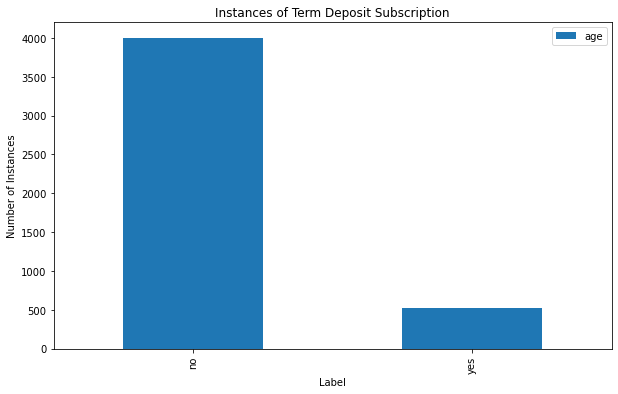

In [103]:
#To understand the distribution of our class label, we created a bar graph, showing the instances of term deposit subscription
#under both yes and no.  From this we could see that they data has far more no values in the class label column.  Becasue of the
#large difference, we chose to complete multiple classification analyses.  One analysis took a more balanced dataset of approximately 600 no values and 
#500 yes values, to see how downsampling would effect the classification model.  While our main analysis focused on the entire dataset
#with the complete ~4,500 rows

label = bank_full[["y", "age"]].rename({"age": "count"})
label = label.groupby(["y"]).count()

#Once we grouped by the classification label and counted all instances within each group, we were able to create a bar graph to visualize the distribution
label.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Label') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Term Deposit Subscription') # add title to the plot

plt.show()



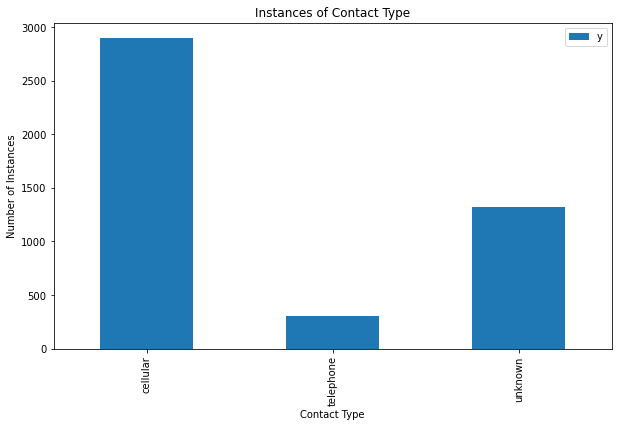

In [104]:
#Next we looked at the attributes that contained an unknown value, starting with the contact column.  From this bar graph, we can
#see that the majority of the values in the contact column were cellular.  There were also ~1250 instances of an unknown value.  When looking at this 
# attribute, we did not see a difference in the values cellular vs. telephone.  In the end we chose to remove this column due to the number of unknown values
#and the similarity between cellular and telephone.  We felt that removing this column would not largely effect our results.

contact = bank_full[["contact","y"]]
contact = contact.groupby(["contact"]).count()

contact.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Contact Type') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Contact Type') # add title to the plot

plt.show()

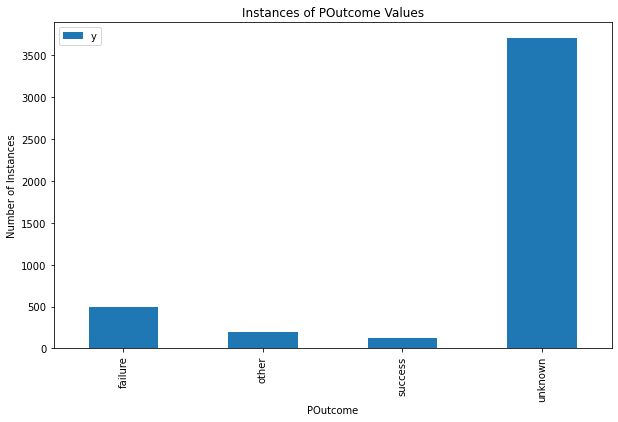

In [105]:
#Next we looked at the POutcome column.  From this bar graph, we can see that a large percentage of the values in this column were unknown.  Becasue the 
#remaining values had very few instances, we felt that this column could be removed during analysis.  Although the column is not strictly one unique value,
#we still felt that one value making up ~80% of the values would be better to remove.


po = bank_full[["poutcome","y"]]
po = po.groupby(["poutcome"]).count()

# After grouping by pOutcome, we were able to count the instances of each value to visualize the differences between each of them using a bar graph
po.plot(kind='bar', figsize=(10, 6))

plt.xlabel('POutcome') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of POutcome Values') # add title to the plot

plt.show()

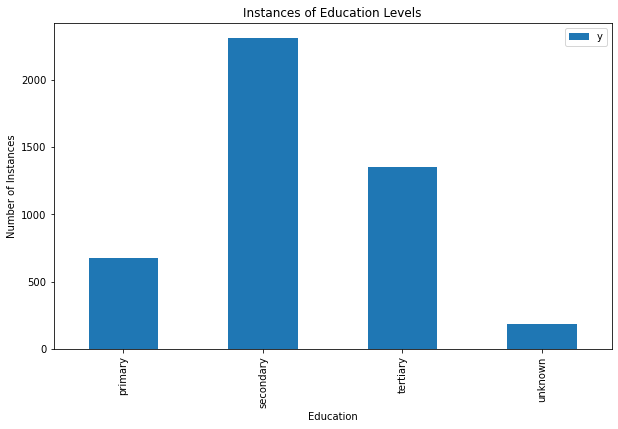

In [106]:
#Another attribute with an unknown value is the education column.  In this column there were three levels of education (primary, secondary, and tertiary)
#and also an unknown.  Unlike the previous attributes we have looked at the education column has a smaller percentage of unknown values (<500).  In this 
#bar graph we can also see that secondary education has the most instances, with tertiary in second.  This graph does not break down each education level
#based on the class label.  It will be interesting to see if there is one education level that would better predict yes/no based on the number of instances.
# For example, if secondary education contained more instances of a no label, we might be able to determine that those with secondary education are
# more likely to say no to a term subscription.

ed = bank_full[["education","y"]]
ed = ed.groupby(["education"]).count()

# After grouping by education, we were able to count the instances of each value to visualize the differences between each of them using a bar graph
ed.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Education') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Education Levels') # add title to the plot

plt.show()

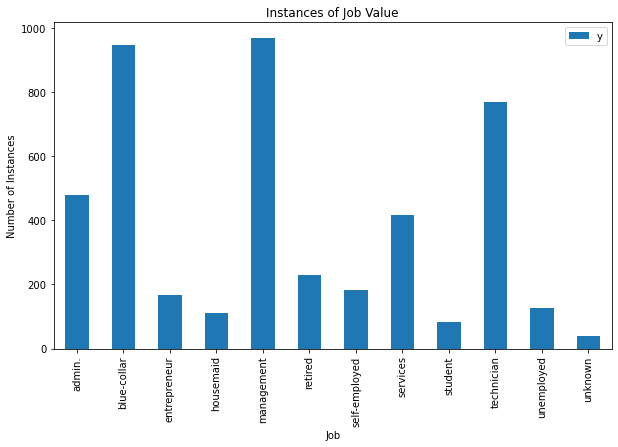

In [107]:
#The job column has 12 unique values, one of which is an unknown.  In this bar graph it is clear that there are a few occupations that have more instances
# in our dataset.  The top three jobs are blue-collar, management, and technician.  Similar to the education column, it will be interesting to break down
#each job into groups based on the class label.  Again, we will be able to comapre the yes/no label within each job to see if there is a specific job
#that is seen more with either a yes or no label.  We can also see that the unknown value has the least amount of instances in this column, so the unknown
#values will not have a large impact on our final model.  A job determines the amount of money an individual makes, which may affect the way they choose to 
#invest their money in a bank.

job = bank_full[["job","y"]]
job = job.groupby(["job"]).count()

# After grouping by job, we were able to count the instances of each value to visualize the differences between each of them using a bar graph
job.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Job') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Job Value') # add title to the plot

plt.show()

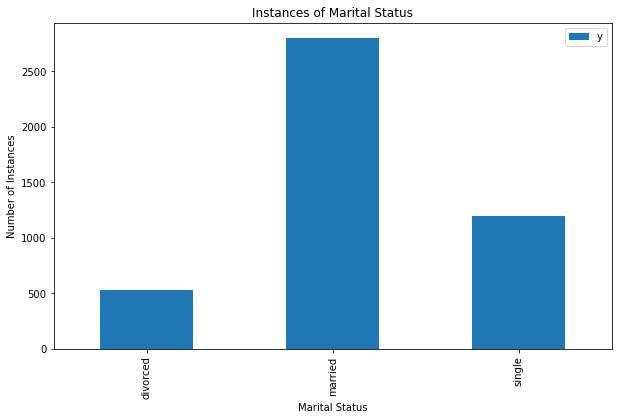

In [108]:
#within the marital column, there were three unique values (single, married, divorced).  We can see that the majority of our data includes individuals who are married.  The value with the
#least instances is divorced.  It will be interesting to see if our future bar graph will show a distinct indication of class label based on marital status.  When thinking about a term subscription
#at a bank, it seems that marital status would not play a huge role in whether or not a person would choose a term subsription.  Of the attributes, education and job may be better predictors of
#those who choose to subscribe.  

marital = bank_full[["marital","y"]]
marital = marital.groupby(["marital"]).count()

# step 2: plot data
marital.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Marital Status') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Marital Status') # add title to the plot

plt.show()

In [109]:
# the next step in our visualizations was to separate the attributes by their class label.  In this code, we wanted to see the job attribute split into their respective labels.  To accomplish
#this, we took the job and label (y) columns and performed a group by.  For this particular groupby, we used marital status as a counter.  Using the result of this groupby, we were then able to 
#create a bar graph that better illustrates the differences between our class label within each group
job2 = bank_full[['job','marital','y']]
job2 = job2.groupby(["job", "y"]).count()
job2

marital
job           y           
admin.        no       420
              yes       58
blue-collar   no       877
              yes       69
entrepreneur  no       153
              yes       15
housemaid     no        98
              yes       14
management    no       838
              yes      131
retired       no       176
              yes       54
self-employed no       163
              yes       20
services      no       379
              yes       38
student       no        65
              yes       19
technician    no       685
              yes       83
unemployed    no       115
              yes       13
unknown       no        31
              yes        7

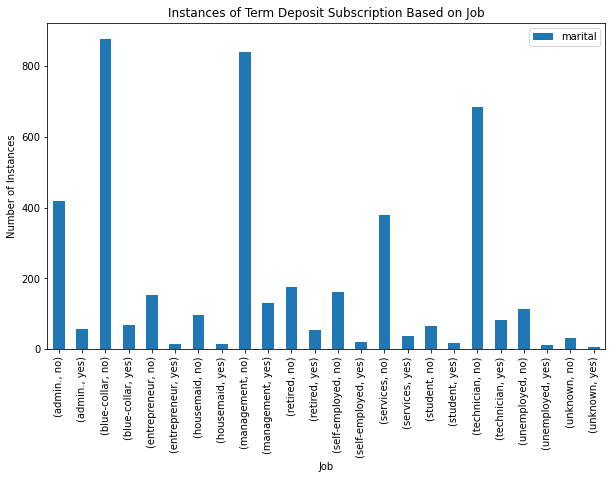

In [110]:
#in this bar graph, there is no job that only contains one value (ex. if admin had all instances in the yes group, it would indicate a job in admin means a yes label).  Becasue of the large discrepancy
#in the amount of yes vs. no labels, it can be hard to understand the bar graph becasue it is clear that there are more instances of a no label in each group.  However, this does not mean that
# every job is an indicator of a no label.  While there are no bars at 0, there are a few that are very close.  Both entrepreneur and housemaid have less than 20 instances with a yes label.  This may 
#indicate that if an individual is a housemaid or entrepreneur they are more likely to be labeled as a no when it comes to subscription.  Becasue these values are not zero, it is not guarunteed that
#their label will be no, it is just more likely.  On the other end, the blue-collar, management, and technician columns all show a large number of class label no.  The large bars for the no label in
#each of these categories is clearly due to the unbalanced nature of the dataset (having more no's in general).  But when creating a training and test set, there is a higher chance that these three
#jobs will be associated with a class label of no, due to the large number of instances. 

job2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Job') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Term Deposit Subscription Based on Job') # add title to the plot

plt.show()

In [111]:
# In this code, we wanted to see the marital attribute split into their respective labels.  To accomplish this, we took the marital and label (y) columns and performed a group by.  
#For this particular groupby, we used job as a counter.  Using the result of this groupby, we were then able to create a bar graph that better illustrates the differences between our class label within each group

marital = bank_full[['job','marital', 'y']]
marital = marital.groupby(["marital", "y"]).count()
marital

job
marital  y        
divorced no    451
         yes    77
married  no   2520
         yes   277
single   no   1029
         yes   167

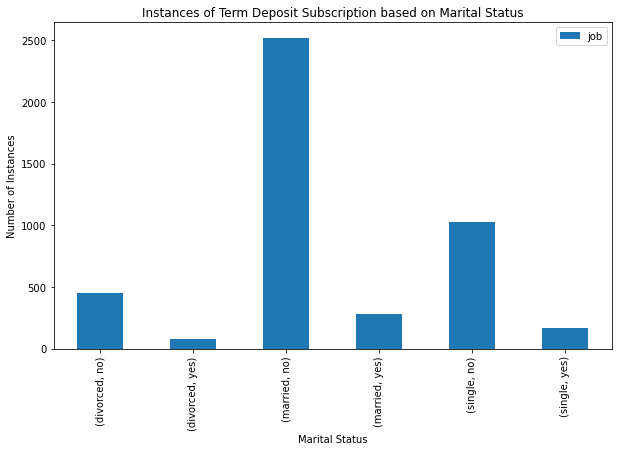

In [112]:
#this bar graph has one bar that is clearly larger than the rest.  Again, this is due to having more instances of a no label in our dataset, which makes this seem like married individuals are
#more likely to say no.  While this may not be the case, when training our model the percentage of married individuals with a no label will likely be much higher.  This will likely result in 
#married being more of an indicator towards a no label (Only 10% of the data has a married individual labeled as yes).

marital.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Marital Status') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Term Deposit Subscription based on Marital Status') # add title to the plot

plt.show()

In [113]:
# In this code, we wanted to see the education attribute split into their respective labels.  To accomplish this, we took the education and label (y) columns and performed a group by.  
#For this particular groupby, we used job as a counter.  Using the result of this groupby, we were then able to create a bar graph that better illustrates the differences between our class label within each group

ed = bank_full[['job','education','y']]
ed = ed.groupby(["education", "y"]).count()
ed

job
education y        
primary   no    614
          yes    64
secondary no   2061
          yes   245
tertiary  no   1157
          yes   193
unknown   no    168
          yes    19

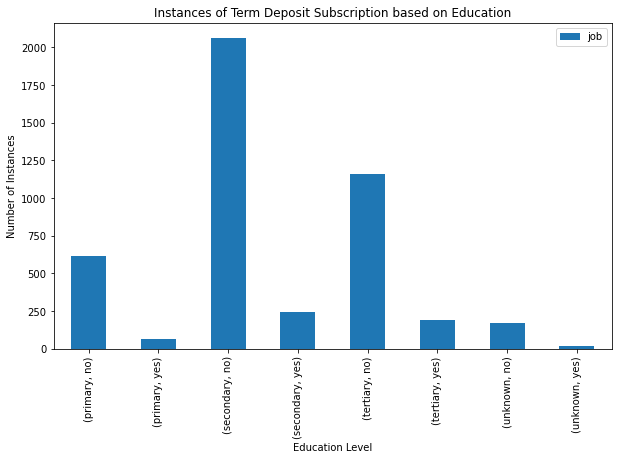

In [114]:
#Similar to the previous graphs, the bars indicating a class label of no are much larger.  In this case, secondary education has the largest amount of instances under the no class label
#Again, this is due to having more instances of a no label in our dataset.  In the primary education there are only 64 instances of a yes label.  In each of our attributes, there was no clear value 
#that appeared to predict whether or not someone would opt for a term subscription.  When creating the model, there may be a combination of each of these attributes that leads to an accurate prediction
#We looked at each attribute alone, which alone any of these attributes would not be able to predict a term subscription.  It will be intersting to see if our model runs better when the class labels 
#are more balanced or if it runs better when there is more data to be trained to see all the various combinations of attributes along with their labels (even if the majority are no).

ed.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Education Level') # add to x-label to the plot
plt.ylabel('Number of Instances') # add y-label to the plot
plt.title('Instances of Term Deposit Subscription based on Education') # add title to the plot

plt.show()

In [115]:
#In this code it uses bins to fit this range of code to be projected along the x axis on the histogram for balance. 

count, bin_edges = np.histogram(bank_full['balance'])
print(count) # frequency count
print(bin_edges) # bin ranges

[4111  340   47   17    4    0    1    0    0    1]
[-3313.   4137.1 11587.2 19037.3 26487.4 33937.5 41387.6 48837.7 56287.8
 63737.9 71188. ]


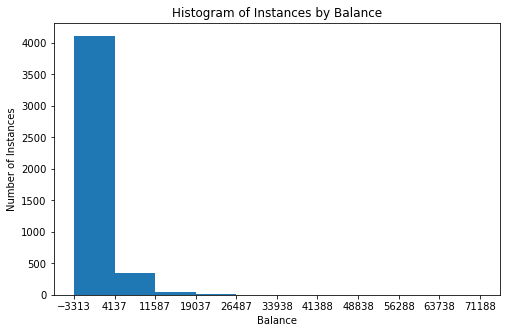

In [116]:
#This shows the instances by balance. It doesn't help us to know whether its a major category to help predict y because it isn't broken down between yes and no. It 
#is really just counting the instances per balance. Later on it is broken down to be more helpful. Balance could potentially be a key predictor. But there are other outside
#factors regarding why someone may or may not want to subscribe to a term that aren't relevant to an account balance, that's why we use other attributes to help predict.

balance = bank_full['balance'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Instances by Balance') # add a title to the histogram
plt.ylabel('Number of Instances') # add y-label
plt.xlabel('Balance') # add x-label

plt.show()

In [117]:
#In this code it uses bins to fit this range of code to be projected along the x axis on the histogram for age. 

count, bin_edges = np.histogram(bank_full['age'])
print(count) # frequency count
print(bin_edges) # bin ranges

[ 111  944 1235  869  612  576  100   36   30    8]
[19.  25.8 32.6 39.4 46.2 53.  59.8 66.6 73.4 80.2 87. ]


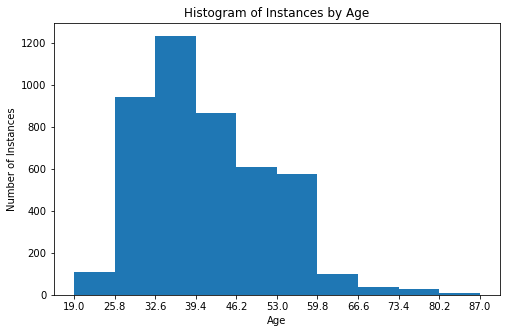

In [118]:
#Similar to above. This shows the number of instances by age, but it isn't broken down by yes or no yet to help us more when evaluating good predictors. Age could be another
#predictor that is very beneficial because you would think that those that are young and might not have as much money would either not want to subscribe to a term whereas 
#middle age people may be the most likely age group that would subscribe. At this point in their
#lives they may have a steady income and are planning for down the road and saving up money. It seems less likely for an old person to subscribe just
#because depending on how long the term is, they may not claim the benefits from it. 

age = bank_full['age'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Instances by Age') # add a title to the histogram
plt.ylabel('Number of Instances') # add y-label
plt.xlabel('Age') # add x-label

plt.show()

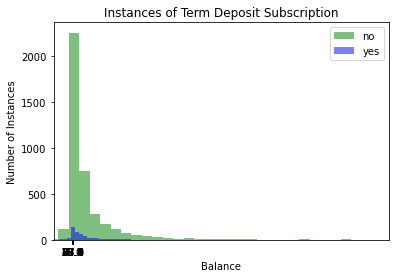

In [119]:
#Using bins for this histogram to see the yes and no's broken down by balance and number of instances is very hard to see and understand at all. The next visualization will
#be much more helpful for this. One thing to keep in mind with the dataset and the histograms going forward is that there is a significantly larger amounts of no's 
#than yes's, so the no portions look overwhelmingly larger compared to the yes's, but the there is more individuals subscribing no anyways.

x1 = bank_full.loc[bank_full.y=='no'].balance #this counts the number of instances by balance, broken down by whether the outcome
#was no
x2 = bank_full.loc[bank_full.y=='yes'].balance #this does the same thing as mentioned above except goes off of yes

kwargs = dict(alpha=.5, bins=75) #creates shading and bin sizes 

plt.hist(x1, **kwargs, color='g', label='no') #labels and adds color to each line mentioned above 
plt.hist(x2, **kwargs, color='b', label='yes')
plt.gca().set(title='Instances of Term Deposit Subscription', ylabel='Number of Instances', xlabel='Balance',xticks=bin_edges) #label's the
#x, y axis and the name of the histogram
plt.xlim(-1750, 30000) #range of the x axiis 
plt.legend();



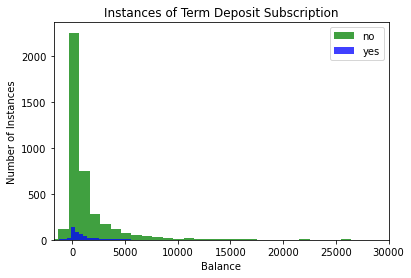

In [120]:
#This histogram is easier to read than the one above. It is still a little difficult just because the balances are so spread out.
#You can see those with account balances between $0 and $5,000 have the most activity. While the numbers are much smaller, between that range the yes's follow similar 
#trend. After $5,00 it drops off a lot and its hard to tell whether there are any more yes's.

x1 = bank_full.loc[bank_full.y=='no'].balance #this counts the number of instances by balance, broken down by whether the outcome
#was no
x2 = bank_full.loc[bank_full.y=='yes'].balance #this does the same thing as mentioned above except goes off of yes

kwargs = dict(alpha=.75, bins=75) #creates shading and bin sizes 

plt.hist(x1, **kwargs, color='g', label='no') #labels and adds color to each line mentioned above 
plt.hist(x2, **kwargs, color='b', label='yes')
plt.gca().set(title='Instances of Term Deposit Subscription', ylabel='Number of Instances', xlabel='Balance') #label's the
#x, y axis and the name of the histogram
plt.xlim(-1750, 30000) #range of the x axiis 
plt.legend();


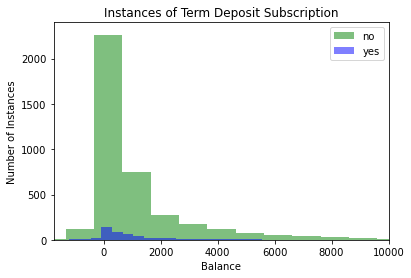

In [121]:
#This is the same histogram as above, just zoomed in to see the accounts with balances between $2,000-$10,000 better. It is still showing a lot of the same things that we 
#saw above. The amount that does subscribe, significantly goes down just before $2,000, but we can see there are still some subscribing a little over $5,000. 

x1 = bank_full.loc[bank_full.y=='no'].balance #this counts the number of instances by balance, broken down by whether the outcome
#was no
x2 = bank_full.loc[bank_full.y=='yes'].balance #this does the same thing as mentioned above except goes off of yes

kwargs = dict(alpha=.5, bins=75) #creates shading and bin sizes 

plt.hist(x1, **kwargs, color='g', label='no') #labels and adds color to each line mentioned above 
plt.hist(x2, **kwargs, color='b', label='yes')
plt.gca().set(title='Instances of Term Deposit Subscription', ylabel='Number of Instances', xlabel='Balance') #label's the
#x, y axis and the name of the histogram
plt.xlim(-1750, 10000) #range of the x axiis 
plt.ylim(0, 2400)
plt.legend();


In [122]:
count, bin_edges = np.histogram(bank_full['age'])
print(count) # frequency count
print(bin_edges) # bin ranges

[ 111  944 1235  869  612  576  100   36   30    8]
[19.  25.8 32.6 39.4 46.2 53.  59.8 66.6 73.4 80.2 87. ]


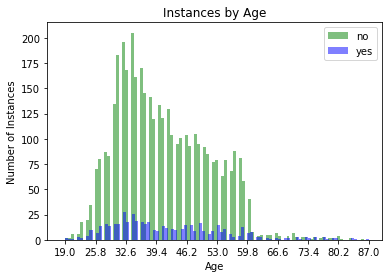

In [123]:
#This histogram shows us the breakdown of yes and nos for each age. As predicted above, you can see people choosing to subscribe increases as they get closer to middle age
# and there's some consistency there, but then there is a decline following that around age 60. 
#Which makes sense when evaluating how age would have an impact on deciding what to do with money, especially when it comes to certain term lengths. 

x1 = bank_full.loc[bank_full.y=='no'].age #this counts the number of instances by age, broken down by whether the outcome
#was no
x2 = bank_full.loc[bank_full.y=='yes'].age #this does the same thing as mentioned above except goes off of yes

kwargs = dict(alpha=0.5, bins=100) 

plt.hist(x1, **kwargs, color='g', label='no')
plt.hist(x2, **kwargs, color='b', label='yes')
plt.gca().set(title='Instances by Age', ylabel='Number of Instances', xlabel='Age', xticks=bin_edges)
plt.xlim(15,90)
plt.legend();

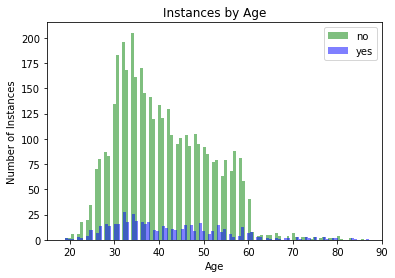

In [124]:
#This is the same histogram as above, just not broken down by bins. It's very similar to the one above, just using a different scale on the x axis. Overall the histograms
#seem proportional from yes to no for age and instances. 

x1 = bank_full.loc[bank_full.y=='no'].age #this counts the number of instances by age, broken down by whether the outcome
#was no
x2 = bank_full.loc[bank_full.y=='yes'].age #this does the same thing as mentioned above except goes off of yes

kwargs = dict(alpha=0.5, bins=100) 

plt.hist(x1, **kwargs, color='g', label='no')
plt.hist(x2, **kwargs, color='b', label='yes')
plt.gca().set(title='Instances by Age', ylabel='Number of Instances', xlabel='Age')
plt.xlim(15,90)
plt.legend();



In [125]:
#The only time variable that we had in our dataset was months.  We chose to use this attribute to create an area plot and see if the month would be any indcator of a term subscription.  
#To accomplish this, we first created a DF with job, month, and label (y).  We then grouped by month and label (y) and renamed the job column to specify it was used for count.  
#At this point, the order of the months was random and did not make much sense in the area plot.  
#December was on the left with April in the middle and there was no logic to it.  To fix this problem, we converted the month column to
#categorical and assigned the months in a specific chosen order.  

m = bank_full[["job", "month", "y"]]
m = m.groupby(["month","y"]).count().reset_index()
m.rename(columns = {'job':'count'}, inplace = True) 

m['month'] = pd.Categorical(m['month'], ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
m.sort_values('month')

,month,y,count
8,jan,no,132
9,jan,yes,16
6,feb,no,184
7,feb,yes,38
15,mar,yes,21
14,mar,no,28
0,apr,no,237
1,apr,yes,56
17,may,yes,93
16,may,no,1305


In [126]:
#once the data was in the groups and order that we needed, we created a pivot table to create columns based on the label (yes/no).  
#This resulted in having 12 rows, one for each month and two columsn
#one for each label.

pivot = m.pivot(columns = "y", index = "month", values = "count")

#display
pivot

y,no,yes
month,,
jan,132,16
feb,184,38
mar,28,21
apr,237,56
may,1305,93
jun,476,55
jul,645,61
aug,554,79
sep,35,17


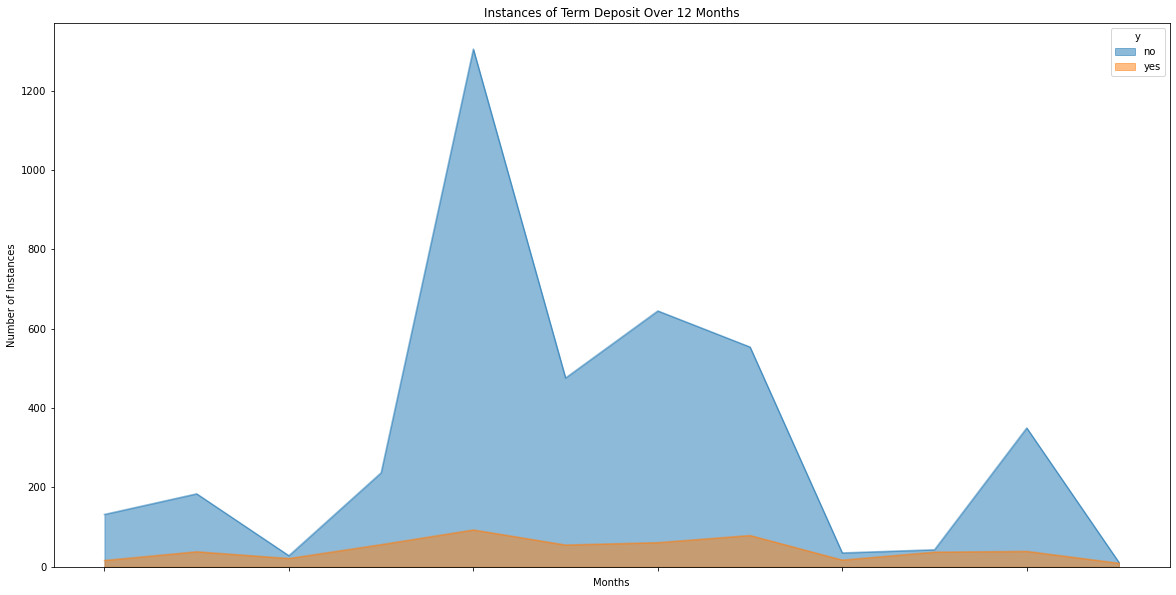

In [127]:
#this area plot shows a large spike in the month of May under the no label.  This spike made us wonder why the month of May seemed to have more instances of no.  
#We also see that there is a  dramatic decrease in the instances of no in the months of September and October.  
#In these months, the instances of yes and no are closer to equal, so these months may not be a good indicator.
#Although there is an uneven balance of yes/no, the no's could have been more spread out over the months, however, the large peak in May could indicate that May 
#is a predictor for a no label.  Again a label cannot be predicted by one attribute, 
#but this spike in the area plot was interesting due to the distribution of instances over a year

pivot.plot(kind='area', stacked=False,figsize=(20, 10))

plt.title('Instances of Term Deposit Over 12 Months')
plt.ylabel('Number of Instances')
plt.xlabel('Months')

plt.show()

In [128]:
#When conducting the chi-square test, there were 5 columns that were removed.  Two of these columns (pdays, and balance) had negative values causing an error in the test.  The other
#three were columns that we originally chose to remove from our analysis due to not being significant attributes based on their values.  
chiSquareDF = bank_full
chiSquareDF.drop(columns=["contact","day","poutcome", "balance", "pdays"], inplace=True)

chiSquareDF

,age,job,marital,education,default,housing,loan,month,duration,campaign,previous,y
0,30,unemployed,married,primary,no,no,no,oct,79,1,0,no
1,33,services,married,secondary,no,yes,yes,may,220,1,4,no
2,35,management,single,tertiary,no,yes,no,apr,185,1,1,no
3,30,management,married,tertiary,no,yes,yes,jun,199,4,0,no
4,59,blue-collar,married,secondary,no,yes,no,may,226,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,yes,no,jul,329,5,0,no
4517,57,self-employed,married,tertiary,yes,yes,yes,may,153,1,0,no
4518,57,technician,married,secondary,no,no,no,aug,151,11,0,no
4519,28,blue-collar,married,secondary,no,no,no,feb,129,4,3,no


In [129]:
#Because the majority of our attributes are categorical, we used label encoding.  After completing the label encoding for each of the attributes, we then has continuous values that
#could be used to create a correlation table as well as conduct the chi-square test.

enc = LabelEncoder()

chiSquareDF['job'] = enc.fit_transform(chiSquareDF['job'])
chiSquareDF['marital'] = enc.fit_transform(chiSquareDF['marital'])
chiSquareDF['education'] = enc.fit_transform(chiSquareDF['education'])
chiSquareDF['default'] = enc.fit_transform(chiSquareDF['default'])
chiSquareDF['housing'] = enc.fit_transform(chiSquareDF['housing'])
chiSquareDF['loan'] = enc.fit_transform(chiSquareDF['loan'])
chiSquareDF['month'] = enc.fit_transform(chiSquareDF['month'])
chiSquareDF['y'] = enc.fit_transform(chiSquareDF['y'])

chiSquareDF.head(10)

,age,job,marital,education,default,housing,loan,month,duration,campaign,previous,y
0,30,10,1,0,0,0,0,10,79,1,0,0
1,33,7,1,1,0,1,1,8,220,1,4,0
2,35,4,2,2,0,1,0,0,185,1,1,0
3,30,4,1,2,0,1,1,6,199,4,0,0
4,59,1,1,1,0,1,0,8,226,1,0,0
5,35,4,2,2,0,0,0,3,141,2,3,0
6,36,6,1,2,0,1,0,8,341,1,2,0
7,39,9,1,1,0,1,0,8,151,2,0,0
8,41,2,1,2,0,1,0,8,57,2,0,0
9,43,7,1,0,0,1,1,0,313,1,2,0


In [130]:
#After using label encoding to crate a DF with continous variables.  We created a correlation table
#in this table the majority of the attributes are not correlated with one another.  The attribute that 
#had the value closest to 1 was duration which had a value of .401 when looking at duration vs. y.
chiSquareDF.corr()

,age,job,marital,education,default,housing,loan,month,duration,campaign,previous,y
age,1.000000,-0.021500,-0.381485,-0.121613,-0.017885,-0.193888,-0.011250,-0.040714,-0.002367,-0.005148,-0.003511,0.045092
job,-0.021500,1.000000,0.069390,0.170160,0.008324,-0.128353,-0.040245,-0.096613,-0.006739,-0.002739,0.005029,0.027401
marital,-0.381485,0.069390,1.000000,0.102714,-0.020745,-0.029851,-0.045210,-0.035855,0.006619,0.005915,0.038028,0.015042
education,-0.121613,0.170160,0.102714,1.000000,-0.010534,-0.087070,-0.054086,-0.050086,-0.014878,-0.001723,0.023983,0.042987
default,-0.017885,0.008324,-0.020745,-0.010534,1.000000,0.006881,0.063994,0.014297,-0.011615,-0.012348,-0.026656,0.001303
housing,-0.193888,-0.128353,-0.029851,-0.087070,0.006881,1.000000,0.018451,0.266630,0.015740,-0.003574,0.038621,-0.104683
loan,-0.011250,-0.040245,-0.045210,-0.054086,0.063994,0.018451,1.000000,0.016329,-0.004997,0.017120,-0.022115,-0.070517
month,-0.040714,-0.096613,-0.035855,-0.050086,0.014297,0.266630,0.016329,1.000000,0.000851,-0.108915,0.046899,-0.040933
duration,-0.002367,-0.006739,0.006619,-0.014878,-0.011615,0.015740,-0.004997,0.000851,1.000000,-0.068382,0.018080,0.401118
campaign,-0.005148,-0.002739,0.005915,-0.001723,-0.012348,-0.003574,0.017120,-0.108915,-0.068382,1.000000,-0.067833,-0.061147


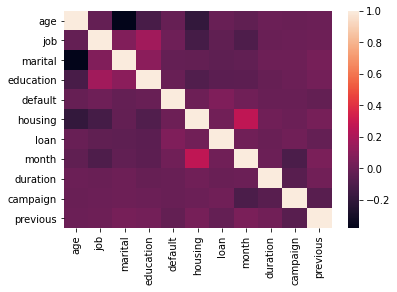

In [131]:
#The following code created a coorelation matrix which uses various shades to indicate the level of correlation.  There are not many areas that stick out, but education vs. job appears to have 
#a little correlation.  This makes sense to us becasue we would think that education level would play a role in the job category that an individual fits in.  The other area that sticks out is
#housing vs. month.  This is interesting because the last month of contact should have no impact on having a house loan.  It would seem more logical that these attributes do not have much correlation

corr = chiSquareDF.iloc[:, :-1].corr()
sb.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

In [132]:
#conducting the chi-square using all the attributes in relation to the class label column "y"

from sklearn.feature_selection import chi2

chi_test = chi2(chiSquareDF.iloc[:, :11], chiSquareDF['y'])
features = pd.DataFrame({
    'features': chiSquareDF.columns[:11],
    'chi2': chi_test[0],
    'p-value': chi_test[1]
})

In [133]:
#We did a Chi-square test that comapared each of the attributes to the y label.  From this test,
#we can see that the p-values for each of these attributes were very small (almost close to 0) which proves that there is a relationship
#between the attributes and the y-label.So, we conclude that
#each of these attributes is significant when looking at the y labeling.  Specifically, 
#previous has a extremely small p-value and duration has a p-value of 0, which would indicate that these two
#attributes have the greatest significance to the y label.This chi-square result reinforces the correlation table
#that we created earlier with this data.
features

,features,chi2,p-value
0,age,24.969622,5.824075e-07
1,job,8.154597,4.295215e-03
2,marital,0.320397,5.713691e-01
3,education,3.802675,5.117077e-02
4,default,0.007543,9.307916e-01
5,housing,21.500801,3.536808e-06
6,loan,19.045258,1.276546e-05
7,month,12.325412,4.468334e-04
8,duration,186041.898000,0.000000e+00
9,campaign,58.504976,2.027775e-14


In [ ]:
'''
Now, we start to work on the model building for binary classification'''

In [135]:
#we can see that our dataset has 4521 rows and 17 attributes (prior to dropping rows before classification)
bank_LARGE.shape

(4521, 17)

In [136]:
#We can see that in this dataset we have 76,857 values
bank_LARGE.size

76857

In [137]:
#checking if there are any missing values in our data
bank_LARGE.isnull().values.sum()

#since the sum of no. of missing values is 0, we do not have any missing values in our data 

0

In [138]:
#checking unique values of each columns to understand the attributes better.  #We looked at the unique values in each of the attributes to get a better understadning of our data.  
#We could see that there are 4 columns (job, education, contact, campaign) that contain values of unknown.  Taking this information, we were able to look
#at the distribution of the unknown values in each of these four columns, to see if the columns were valuable to our future analysis.

print('age:',bank_LARGE.age.unique())
print('job:',bank_LARGE.job.unique())
print('marital:',bank_LARGE.marital.unique())
print('education:',bank_LARGE.education.unique())
print('default:',bank_LARGE.default.unique())
print('balance:',bank_LARGE.balance.unique())
print('housing:',bank_LARGE.housing.unique())
print('loan:',bank_LARGE.loan.unique())
print('month:',bank_LARGE.month.unique())
print('duration:',bank_LARGE.duration.unique())
print('campaign:',bank_LARGE.campaign.unique())
print('pdays:',bank_LARGE.pdays.unique())
print('previous:',bank_LARGE.previous.unique())
print('y:', bank_LARGE.y.unique())


age: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
job: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital: ['married' 'single' 'divorced']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
balance: [ 1787  4789  1350 ...  -333 -3313  1137]
housing: ['no' 'yes']
loan: ['no' 'yes']
month: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
duration: [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97  132  765   16  609  106
  365  205   11  105   59  425  204  181 1018 1740   98  441  272  159
  295  314  579  554  323  227  134  223  155  13

In [139]:
#dropping columns 'contact', 'day', 'poutcome'.  After our earlier analysis, we felt that
#these columns would not be beneficial to our model due to the number of unknown values or being insignificant

bank_LARGE.drop(columns=["contact","day","poutcome"], inplace=True)


In [141]:
#viewing the dataframe after dropping 3 columns
bank_LARGE.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,30,unemployed,married,primary,no,1787,no,no,oct,79,1,-1,0,no
1,33,services,married,secondary,no,4789,yes,yes,may,220,1,339,4,no
2,35,management,single,tertiary,no,1350,yes,no,apr,185,1,330,1,no
3,30,management,married,tertiary,no,1476,yes,yes,jun,199,4,-1,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,may,226,1,-1,0,no


In [142]:
bank_LARGE.shape

#we can see that the number of columns decreases from 17 to 14

(4521, 14)

In [143]:
#Getting all other attributes beside class label/target attribute out of dataframe; meaning attributes that represent the X

X = bank_LARGE.iloc[:, :-1].values
X

array([[30, 'unemployed', 'married', ..., 1, -1, 0],
       [33, 'services', 'married', ..., 1, 339, 4],
       [35, 'management', 'single', ..., 1, 330, 1],
       ...,
       [57, 'technician', 'married', ..., 11, -1, 0],
       [28, 'blue-collar', 'married', ..., 4, 211, 3],
       [44, 'entrepreneur', 'single', ..., 2, 249, 7]], dtype=object)

In [144]:
#Then we take the class label/target attribute out of DataFrame and store it in y
y = bank_LARGE.iloc[:, -1].values
y

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [203]:
'''the target attribute's values are all categorical, 
to do a better analysis, it is better to change the class label 
into binary values 0 or 1 using LabelEncoder

For the LabelEncoder to run, it must be imported from 
sklearn.preprocessing library'''

"the target attribute's values are all categorical, \nto do a better analysis, it is better to change the class label \ninto binary values 0 or 1 using LabelEncoder\n\nFor the LabelEncoder to run, it must be imported from \nsklearn.preprocessing library"

In [145]:
#Converting our class label into binary value

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[0 0 0 ... 0 0 0]


In [146]:
y.shape

(4521,)

In [202]:

'''
Next is converting the Class using OneHotEncoder, this also have to be 
imported from sklearn.preprocessing library

In Label Encoding, each label is assigned to a unique integer based on the order,
the model can miunderstand the data,  this can result in one category to be greater than the other

To avoid the problem, it is better to convert to One Hot Encoding, it takes the value 
that has been Label Encoded and splits to multiple column with values of 0 and 1, which removes the problem of one 
number being greater than another
'''

'\nNext is converting the Class using OneHotEncoder, this also have to be \nimported from sklearn.preprocessing library\n\nIn Label Encoding, each label is assigned to a unique integer based on the order,\nthe model can miunderstand the data,  this can result in one category to be greater than the other\n\nTo avoid the problem, it is better to convert to One Hot Encoding, it takes the value \nthat has been Label Encoded and splits to multiple column with values of 0 and 1, which removes the problem of one \nnumber being greater than another\n'

In [147]:
#onehotencoding the categorical varibales in order to build better predictors 
#using just label encoding may affect the model's decision as 1 is smaller than 2 and 2 is smaller than 3 and so on

from sklearn.preprocessing import OneHotEncoder

JOB = OneHotEncoder().fit_transform(bank_LARGE[['job']]).toarray()
MARITAL = OneHotEncoder().fit_transform(bank_LARGE[['marital']]).toarray()
EDUCATION = OneHotEncoder().fit_transform(bank_LARGE[['education']]).toarray()
DEFAULT = OneHotEncoder().fit_transform(bank_LARGE[['default']]).toarray()
HOUSING = OneHotEncoder().fit_transform(bank_LARGE[['housing']]).toarray()
LOAN = OneHotEncoder().fit_transform(bank_LARGE[['loan']]).toarray()
MONTH = OneHotEncoder().fit_transform(bank_LARGE[['month']]).toarray()

In [148]:
#Lets convert all one hot encoded columns from Numpy Array to Data Frame

JOB_DF=pd.DataFrame(JOB).astype(int)
MARITAL=pd.DataFrame(MARITAL).astype(int)
EDUCATION_DF=pd.DataFrame(EDUCATION).astype(int)
DEFAULT_DF=pd.DataFrame(DEFAULT).astype(int)
HOUSING_DF=pd.DataFrame(HOUSING).astype(int)
LOAN_DF=pd.DataFrame(LOAN).astype(int)
MONTH_DF=pd.DataFrame(MONTH).astype(int)

In [149]:
#Lets drop all original columns that are one hot encoded from bank_LARGE dataframe 
bank_LARGE.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','month','y'], inplace=True)

In [150]:
#Lets combine all the datframe to retrive original X dataFrame or dataframe of all predictors
BANK_DF=pd.concat([bank_LARGE,JOB_DF,MARITAL,EDUCATION_DF,DEFAULT_DF, HOUSING_DF, LOAN_DF, MONTH_DF], axis=1)

In [151]:
BANK_DF

,age,balance,duration,campaign,pdays,previous,0,1,2,3,...,2,3,4,5,6,7,8,9,10,11
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,329,5,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4517,57,-3313,153,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4518,57,295,151,11,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4519,28,1137,129,4,211,3,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [49]:
#making sure we feed only integer values to our model
BANK_DF.dtypes

age         int64
balance     int64
duration    int64
campaign    int64
pdays       int64
previous    int64
0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
0           int64
1           int64
2           int64
0           int64
1           int64
2           int64
3           int64
0           int64
1           int64
0           int64
1           int64
0           int64
1           int64
0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
dtype: object

In [152]:
X=BANK_DF.values

In [153]:
#Sampling - Train Test Split 
#The line test_size=0.2 suggests that the test data should be 20% of the dataset and the rest should be train data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3616, 43) (3616,)
Test set: (905, 43) (905,)


In [154]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [155]:
X_train

array([[  64,  679,  135, ...,    0,    0,    0],
       [  53, -626,  205, ...,    0,    0,    0],
       [  36, -129,  121, ...,    0,    0,    0],
       ...,
       [  31,  137,  385, ...,    0,    0,    0],
       [  42, 9009,  135, ...,    1,    0,    0],
       [  39,  246,   86, ...,    0,    0,    0]])

In [156]:
#using tree based classifier for model building
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [157]:
#prediction
y_predict=clf.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [158]:
#Accuracy evaluation

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.8585635359116022


In [159]:
#Confusion matrix 

from sklearn.metrics import confusion_matrix
labels=[0, 1]
cm=confusion_matrix(y_test,y_predict,labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[733  73]
 [ 55  44]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [160]:
"""
Confusion matrix:
            Actual 0.  Actual 1
Predicted 0 [734       72]
Predicted 1 [55        44]

Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = (734+44)/905
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = (55+72)/905
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 734/(734+72)
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 734/(734+55)
Type I error= [Predicted 0 and Actual 1]= 72
Type II error= [Predicted 1 and Actual 0]= 55
"""

'\nConfusion matrix:\n            Actual 0.  Actual 1\nPredicted 0 [734       72]\nPredicted 1 [55        44]\n\nAccuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation\n        = (734+44)/905\nError= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation\n     = (55+72)/905\nPrecision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]\n         = 734/(734+72)\nRecall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]\n      = 734/(734+55)\nType I error= [Predicted 0 and Actual 1]= 72\nType II error= [Predicted 1 and Actual 0]= 55\n'

In [161]:
#(K-NN) based classifier

from sklearn.neighbors import KNeighborsClassifier
k = 5

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [162]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [163]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9012721238938053
Test set Accuracy:  0.881767955801105


In [164]:
#Confusion matrix is another handy evaluation of model
from sklearn.metrics import confusion_matrix
labels=[0, 1]
cm=confusion_matrix(y_test,yhat,labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[780  26]
 [ 81  18]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [165]:
"""
Confusion matrix:
            Actual 0.  Actual 1
Predicted 0 [780       26]
Predicted 1 [81        18]

Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = (780+89)/905
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = (81+26)/905
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 780/(780+26)
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 780/(780+81)
Type I error= [Predicted 0 and Actual 1]= 26
Type II error= [Predicted 1 and Actual 0]= 81
"""

'\nConfusion matrix:\n            Actual 0.  Actual 1\nPredicted 0 [780       26]\nPredicted 1 [81        18]\n\nAccuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation\n        = (780+89)/905\nError= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation\n     = (81+26)/905\nPrecision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]\n         = 780/(780+26)\nRecall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]\n      = 780/(780+81)\nType I error= [Predicted 0 and Actual 1]= 26\nType II error= [Predicted 1 and Actual 0]= 81\n'

In [204]:
'''
Decision tree vs KNN : Both are non-parametric methods. Decision tree supports automatic feature interaction,
whereas KNN cant. Decision tree is faster due to KNN's expensive real time execution.'''

"\nDecision tree vs KNN : Both are non-parametric methods. Decision tree supports automatic feature interaction,\nwhereas KNN cant. Decision tree is faster due to KNN's expensive real time execution."

In [205]:
'''END OF MODEL BUILDING USING LARGER DATASET OF 4,521 ROWS'''

'END OF MODEL BUILDING USING LARGER DATASET OF 4,521 ROWS'

In [168]:

'''
HERE ONWARDS, WE CREATE THE SAME TREE BASED CLASSIFER AND KNN CLASSIFIER MODELS, BUT WE USE A SMALLER DATASET WITH EQUAL NUMBER OF YES AND NO TO SEE
IF THERE WILL BE ANY CHANGE IN ACCURACY'''


#Working on the model building using smaller dataset of 1122 rows

bank_small.shape

(1121, 17)

In [169]:
bank_small.size

19057

In [170]:
#checking if there are any missing values in our data
bank_small.isnull().values.sum()

#since the sum of no. of missing values is 0, we do not have any missing value in our data 

0

In [171]:
#checking unique values of each columns

print('age:',bank_small.age.unique())
print('job:',bank_small.job.unique())
print('marital:',bank_small.marital.unique())
print('education:',bank_small.education.unique())
print('default:',bank_small.default.unique())
print('balance:',bank_small.balance.unique())
print('housing:',bank_small.housing.unique())
print('loan:',bank_small.loan.unique())
print('month:',bank_small.month.unique())
print('duration:',bank_small.duration.unique())
print('campaign:',bank_small.campaign.unique())
print('pdays:',bank_small.pdays.unique())
print('previous:',bank_small.previous.unique())
print('y:', bank_small.y.unique())


age: [40 50 52 39 53 54 35 47 37 46 36 29 44 34 30 33 45 59 31 79 19 48 32 51
 57 60 28 38 43 23 42 41 58 25 67 49 66 70 55 26 56 77 27 22 24 78 64 20
 68 61 21 75 63 80 83 71 74 62 73 72 87 69 84 65]
job: ['blue-collar' 'retired' 'entrepreneur' 'technician' 'management'
 'self-employed' 'admin.' 'unknown' 'housemaid' 'services' 'student'
 'unemployed']
marital: ['married' 'divorced' 'single']
education: ['primary' 'secondary' 'tertiary' 'unknown']
default: ['no' 'yes']
balance: [  177   283   353     2     0  6102  1584   980   233  -107  2904   470
  1673   216  2403  -932   174 -1313   347  4503  6900   825  2727  2988
   999   175  1291  9324   -11   223   168    50  1350   148  2628  1169
    20   214    93   467  3230  3232  1623     4  1328  1221    89  -195
   181   907 14533  2662    99   781  -331  1663    81    48   328   280
   428  4366   180  7353   316   589 -1746  2974     1  1012  1787  2571
  -110   500   309   411  2885  1906 10924  2769  3315  5980   795   687
   -5

In [173]:
#dropping columns 'contact', 'day', 'poutcome'
bank_small.drop(columns=["contact","day","poutcome"], inplace=True)


In [175]:
bank_small.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,y
0,40,blue-collar,married,primary,no,177,yes,yes,jul,742,4,-1,0,no
1,50,blue-collar,married,secondary,no,283,yes,no,aug,226,3,-1,0,no
2,52,retired,divorced,primary,no,353,no,no,jul,395,4,-1,0,no
3,39,entrepreneur,married,tertiary,no,2,yes,no,nov,180,1,-1,0,no
4,53,technician,divorced,secondary,no,0,yes,yes,jul,135,5,-1,0,no


In [177]:
bank_small.shape

(1121, 14)

In [178]:
#Lets get all other attributes beside class label/target attribute out of dataframe 
X = bank_small.iloc[:, :-1].values
X

array([[40, 'blue-collar', 'married', ..., 4, -1, 0],
       [50, 'blue-collar', 'married', ..., 3, -1, 0],
       [52, 'retired', 'divorced', ..., 4, -1, 0],
       ...,
       [42, 'blue-collar', 'single', ..., 3, 370, 4],
       [32, 'admin.', 'single', ..., 3, -1, 0],
       [46, 'blue-collar', 'married', ..., 2, -1, 0]], dtype=object)

In [179]:
#lets get the class label/target attribute out of DataFrame
y = bank_small.iloc[:, -1].values
y

array(['no', 'no', 'no', ..., 'yes', 'yes', 'yes'], dtype=object)

In [180]:
#Converting our class label into binary value

from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [181]:
y.shape

(1121,)

In [183]:
#onehotencoding
from sklearn.preprocessing import OneHotEncoder

JOB = OneHotEncoder().fit_transform(bank_small[['job']]).toarray()
MARITAL = OneHotEncoder().fit_transform(bank_small[['marital']]).toarray()
EDUCATION = OneHotEncoder().fit_transform(bank_small[['education']]).toarray()
DEFAULT = OneHotEncoder().fit_transform(bank_small[['default']]).toarray()
HOUSING = OneHotEncoder().fit_transform(bank_small[['housing']]).toarray()
LOAN = OneHotEncoder().fit_transform(bank_small[['loan']]).toarray()
MONTH = OneHotEncoder().fit_transform(bank_small[['month']]).toarray()

In [184]:
#Lets convert all one hot encoded columns from Numpy Array to Data Frame

JOB_DF=pd.DataFrame(JOB).astype(int)
MARITAL=pd.DataFrame(MARITAL).astype(int)
EDUCATION_DF=pd.DataFrame(EDUCATION).astype(int)
DEFAULT_DF=pd.DataFrame(DEFAULT).astype(int)
HOUSING_DF=pd.DataFrame(HOUSING).astype(int)
LOAN_DF=pd.DataFrame(LOAN).astype(int)
MONTH_DF=pd.DataFrame(MONTH).astype(int)

In [186]:
#Lets drop all original columns that are one hot encoded from bank dataframe 
bank_small.drop(columns=['job', 'marital', 'education', 'default', 'housing', 'loan','month','y'], inplace=True)

In [187]:
#Lets combine all the datframe to retrive original X dataFrame or dataframe of all predictors
BANK_DF=pd.concat([bank_small,JOB_DF,MARITAL,EDUCATION_DF,DEFAULT_DF, HOUSING_DF, LOAN_DF, MONTH_DF], axis=1)

In [188]:
BANK_DF

,age,balance,duration,campaign,pdays,previous,0,1,2,3,...,2,3,4,5,6,7,8,9,10,11
0,40,177,742,4,-1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,50,283,226,3,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,353,395,4,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,39,2,180,1,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,53,0,135,5,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,26,668,576,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1117,60,362,816,6,-1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1118,42,1080,951,3,370,4,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1119,32,620,1234,3,-1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [189]:
#making sure we feed only integer values to our model
BANK_DF.dtypes

age         int64
balance     int64
duration    int64
campaign    int64
pdays       int64
previous    int64
0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
0           int64
1           int64
2           int64
0           int64
1           int64
2           int64
3           int64
0           int64
1           int64
0           int64
1           int64
0           int64
1           int64
0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
10          int64
11          int64
dtype: object

In [190]:
X=BANK_DF.values

In [191]:
#Sampling - Train Test Split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (896, 43) (896,)
Test set: (225, 43) (225,)


In [192]:
y_train

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,

In [193]:
X_train

array([[  27, -151,  283, ...,    0,    0,    0],
       [  45,    0, 1472, ...,    0,    0,    0],
       [  39,  285,  209, ...,    0,    0,    0],
       ...,
       [  58, 1013,  206, ...,    0,    0,    0],
       [  47,   57,  253, ...,    0,    0,    0],
       [  59,    0,  425, ...,    0,    0,    0]])

In [194]:
#using tree based classifier for model building
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [195]:
#prediction
y_predict=clf.predict(X_test)
y_predict

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0])

In [196]:
#Accuracy evaluation

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

Train set Accuracy:  1.0
Test set Accuracy:  0.7777777777777778


In [197]:
#Confusion matrix is another handy evaluation of model

from sklearn.metrics import confusion_matrix
labels=[0, 1]
cm=confusion_matrix(y_test,y_predict,labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[87 25]
 [25 88]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
"""
Confusion matrix:
            Actual 0.  Actual 1
Predicted 0 [87         25]
Predicted 1 [ 25        88]

Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = (87+88)/225
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = (25+25)/225
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 87/(87+25)
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 87/(87+25)
Type I error= [Predicted 0 and Actual 1]= 25
Type II error= [Predicted 1 and Actual 0]=25
"""

In [198]:
#(K-NN) based classifier

from sklearn.neighbors import KNeighborsClassifier
k = 5

#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [199]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 0, 0, 0])

In [200]:
#Accuracy evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8013392857142857
Test set Accuracy:  0.7288888888888889


In [201]:
#Confusion matrix is another handy evaluation of model
from sklearn.metrics import confusion_matrix
labels=[0, 1]
cm=confusion_matrix(y_test,yhat,labels)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[82 30]
 [31 82]]


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [ ]:
"""
Confusion matrix:
            Actual 0.  Actual 1
Predicted 0 [82       30]
Predicted 1 [ 31        82]

Accuracy= [Predicted 0 and Actual 0] # + [Predicted 1 and Actual 1] # / Total popullation
        = (82+82)/225
Error= [Predicted 1 but Actual 0] # + [Predicted 0 and Actual 1] # / Total popullation
     = (31+30)/225
Precision= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 0 and Actual 1]
         = 82/(82+30)
Recall= [Predicted 0 and Actual 0]/[Predicted 0 and Actual 0]+[Predicted 1 and Actual 0]
      = 82/(82+31)
Type I error= [Predicted 0 and Actual 1]= 30
Type II error= [Predicted 1 and Actual 0]=31
"""